In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train=pd.read_csv('/content/traincsv.csv')
train

<ipython-input-2-b67bc83c940f>:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv('/content/traincsv.csv')


,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756.0,5292.0,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4
...,...,...,...,...,...,...
774150,10197979.0,Gampaha,3893.4,3893.4,3448.44,3
774151,10494575.0,Katunayake,6095.86,5557.99,6275.15,3
774152,10565682.0,Colombo,5121.42,4820.16,4669.53,3
774153,10351977.0,Kandy,6311.76,6311.76,5940.48,3


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB


In [4]:
train = train.rename(columns={'cluster_catgeory': 'cluster_category'})
print(train.columns)

Index(['Customer_ID', 'outlet_city', 'luxury_sales', 'fresh_sales',
       'dry_sales', 'cluster_category'],
      dtype='object')


In [5]:
train.isnull().sum()

,0
Customer_ID,2
outlet_city,2
luxury_sales,35
fresh_sales,41
dry_sales,30
cluster_category,1


In [6]:
for column in train.columns:
    unique_count = train[column].nunique()
    print(f"Total unique values in '{column}' column: {unique_count}")


Total unique values in 'Customer_ID' column: 774153
Total unique values in 'outlet_city' column: 20
Total unique values in 'luxury_sales' column: 143897
Total unique values in 'fresh_sales' column: 257030
Total unique values in 'dry_sales' column: 270131
Total unique values in 'cluster_category' column: 18


In [7]:
for column in train.columns:
  print(f"Unique values in '{column}' column:")
  print(train[column].unique())
  print("\n")


Unique values in 'Customer_ID' column:
[10493832. 10178643. 10513916. ... 10565682. 10351977. 10637635.]


Unique values in 'outlet_city' column:
['Kelaniya' 'Moratuwa' 'Wattala' 'Homagama' 'Dehiwala-Mount Lavinia'
 'Panadura' 'Kaduwela' 'Peliyagoda' 'Kotte' 'Nuwara Eliya' 'Batticaloa'
 'Colombo' 'Jaffna' 'Gampaha' 'Kalmunai' 'Galle' 'Katunayake' 'Negombo'
 'Trincomalee' 'Kandy' nan]


Unique values in 'luxury_sales' column:
['1209.6' '1590.12' '2288.88' ... '2624.65' '5121.42' '5833.5']


Unique values in 'fresh_sales' column:
[756.0 1060.08 1481.04 ... '3723.52' '4740.83' '4820.16']


Unique values in 'dry_sales' column:
[5292.0 6007.12 9155.52 ... 3448.44 6275.15 6611.3]


Unique values in 'cluster_category' column:
['4' '1' '99' '2' '5' '3' '6' '6\\' 4 2 1 95 3 98 5 6 nan 100.0 89.0]




In [8]:
train['luxury_sales'] = train['luxury_sales'].astype(str).str.strip()
train['fresh_sales'] = train['fresh_sales'].astype(str).str.strip()
train['dry_sales'] = train['dry_sales'].astype(str).str.strip()

In [9]:
import re
string_luxury_sales=train['luxury_sales'][train['luxury_sales'].apply(lambda x:bool(re.match(r'[a-zA-Z]',str(x))))]
string_luxury_sales.value_counts()

,count
luxury_sales,
nan,35
nul,3
One thousand four hundread ruppes,1
Eight hundread ruppess,1
six hundread and hirty,1
Thousand tow hundread,1
seven hundread and nine ruppees,1
Three thousand two hundread ruppess,1
Four thousand one hundread ruppess,1


In [10]:
string_fresh_sales=train['fresh_sales'][train['fresh_sales'].apply(lambda x:bool(re.match(r'[a-zA-Z]',str(x))))]
string_fresh_sales.value_counts()

,count
fresh_sales,
nan,41
nul,4
Six hundread and five ruppes,1
Three thousana and five hundread,1
thirteen thousand ruppes,1
Five thousand ruppes,1
Two thousand seven hundread ruppess,1


In [11]:
string_dry_sales=train['dry_sales'][train['dry_sales'].apply(lambda x:bool(re.match(r'[a-zA-Z]',str(x))))]
string_dry_sales.value_counts()

,count
dry_sales,
nan,30
nul,7
Four thousand and two hundread ruppes,1


In [12]:
import pandas as pd

# Manually replace specific values in both luxury_sales and fresh_sales
train.replace({
    'luxury_sales': {
        'One thousand four hundread ruppes': '1400',
        'Eight hundread ruppess': '800',
        'six hundread and hirty': '630',
        'Thousand tow hundread': '1200',
        'seven hundread and nine ruppees': '709',
        'Three thousand two hundread ruppess': '3200',
        'Four thousand one hundread ruppess': '4100'
    },
    'fresh_sales': {
        'Six hundread and five ruppes': '605',
        'Three thousana and five hundread': '3500',
        'thirteen thousand ruppes': '13000',
        'Five thousand ruppes': '5000',
        'Two thousand seven hundread ruppess': '2700'
    },
    'dry_sales': {
        'Four thousand and two hundread ruppes': '4200'
    }

}, inplace=True)

# Convert luxury_sales to numeric
train['luxury_sales'] = pd.to_numeric(train['luxury_sales'], errors='coerce').astype('float')
train['fresh_sales'] = pd.to_numeric(train['fresh_sales'], errors='coerce').astype('float')
train['dry_sales'] = pd.to_numeric(train['dry_sales'], errors='coerce').astype('float')

# Print the data type of luxury_sales
print(train['luxury_sales'].dtypes)
print(train['fresh_sales'].dtypes)
print(train['dry_sales'].dtypes)


float64
float64
float64


In [13]:
train.isnull().sum()

,0
Customer_ID,2
outlet_city,2
luxury_sales,38
fresh_sales,45
dry_sales,37
cluster_category,1


In [14]:
missing_values = train.isnull().sum()
missing_percentage = (missing_values / len(train)) * 100

missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
missing_df = missing_df[missing_df['Missing Values'] > 0]
print(missing_df)


                  Missing Values  Percentage (%)
Customer_ID                    2        0.000258
outlet_city                    2        0.000258
luxury_sales                  38        0.004909
fresh_sales                   45        0.005813
dry_sales                     37        0.004779
cluster_category               1        0.000129


In [15]:
train['cluster_category'] = train['cluster_category'].astype(str)


In [16]:
print(train['cluster_category'].unique())

['4' '1' '99' '2' '5' '3' '6' '6\\' '95' '98' '1.0' 'nan' '100.0' '6.0'
 '2.0' '3.0' '4.0' '5.0' '89.0']


In [17]:
# Manually replace specific values
train['cluster_category'] = train['cluster_category'].replace({
    '6\\': '6' ,
    '100.0': '100',
    '6.0': '6',
    '2.0': '2',
    '3.0': '3',
    '4.0': '4',
    '5.0': '5',
    '1.0': '1',
    '89.0': '89'
})


# Print the cleaned unique values
print(train['cluster_category'].unique())


['4' '1' '99' '2' '5' '3' '6' '95' '98' 'nan' '100' '89']


In [18]:
train = train[train['cluster_category'].isin(['1', '2', '3', '4', '5', '6'])]

# Print the DataFrame to verify the rows have been dropped
print(train)

        Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
0        10493832.0    Kelaniya       1209.60       756.00    5292.00   
1        10178643.0    Moratuwa       1590.12      1060.08    6007.12   
2        10513916.0     Wattala       2288.88      1481.04    9155.52   
3        10334589.0     Wattala       2274.94      1739.66    9099.76   
4        10458365.0    Kelaniya       2345.49      2069.55    9243.99   
...             ...         ...           ...          ...        ...   
774150   10197979.0     Gampaha       3893.40      3893.40    3448.44   
774151   10494575.0  Katunayake       6095.86      5557.99    6275.15   
774152   10565682.0     Colombo       5121.42      4820.16    4669.53   
774153   10351977.0       Kandy       6311.76      6311.76    5940.48   
774154   10637635.0     Negombo       5833.50      6027.95    6611.30   

       cluster_category  
0                     4  
1                     1  
2                     4  
3                  

In [19]:
mode_value = train['cluster_category'].mode()[0]
print("Mode of cluster_category:", mode_value)


Mode of cluster_category: 1


In [20]:
train['outlet_city'] = train['outlet_city'].fillna(train['outlet_city'].mode()[0])
train['cluster_category'] = train['cluster_category'].fillna(train['cluster_category'].mode()[0])

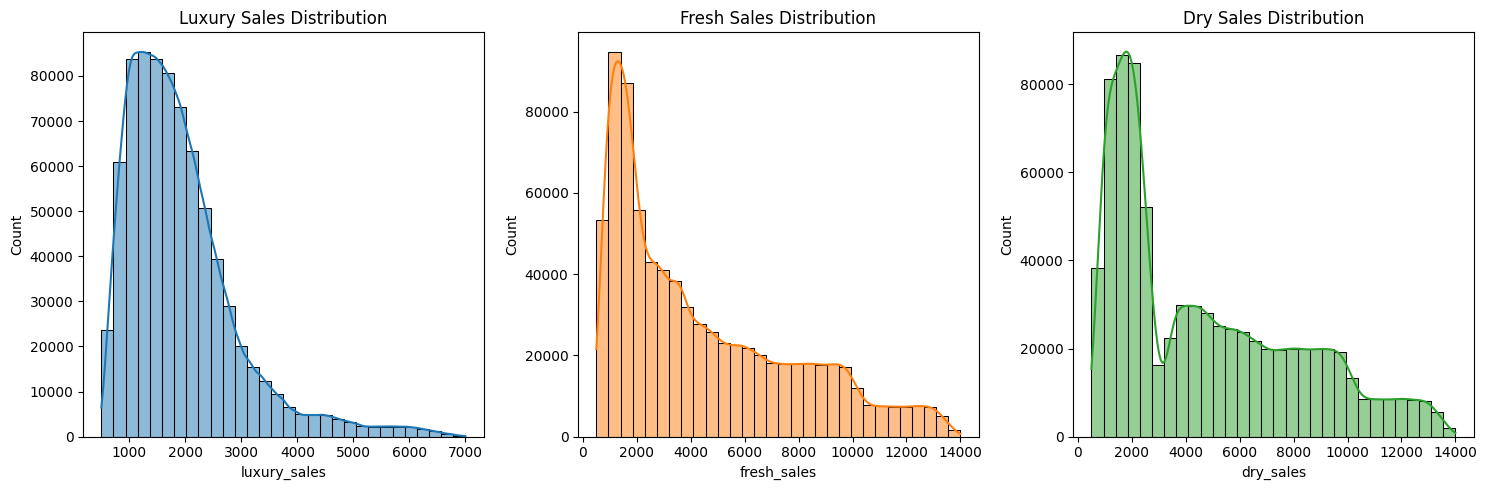

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(15, 5))

# Luxury Sales Histogram with custom color
plt.subplot(1, 3, 1)
sns.histplot(train['luxury_sales'], bins=30, kde=True, color='#1f77b4')  # Blue color
plt.title('Luxury Sales Distribution')

# Fresh Sales Histogram with custom color
plt.subplot(1, 3, 2)
sns.histplot(train['fresh_sales'], bins=30, kde=True, color='#ff7f0e')  # Orange color
plt.title('Fresh Sales Distribution')

# Dry Sales Histogram with custom color
plt.subplot(1, 3, 3)
sns.histplot(train['dry_sales'], bins=30, kde=True, color='#2ca02c')  # Green color
plt.title('Dry Sales Distribution')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [22]:
original_data = train.copy()


In [23]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
train[['luxury_sales', 'fresh_sales', 'dry_sales']] = imputer.fit_transform(train[['luxury_sales', 'fresh_sales', 'dry_sales']])

In [24]:
from scipy.stats import skew, kurtosis

def compare_distribution_change_knn(column):
    print(f"\n--- {column.upper()} DISTRIBUTION CHANGE (KNN Imputation) ---")
    original = original_data[column]
    knn_imputed = train[column]

    print("Original (with missing values):")
    print(f"  Count: {original.count()}, Mean: {original.mean():.2f}, Median: {original.median():.2f}, Std: {original.std():.2f},")
    print(f"  Skewness: {skew(original.dropna()):.2f}, Kurtosis: {kurtosis(original.dropna()):.2f}")

    print("After KNN Imputation:")
    print(f"  Count: {knn_imputed.count()}, Mean: {knn_imputed.mean():.2f}, Median: {knn_imputed.median():.2f}, Std: {knn_imputed.std():.2f},")
    print(f"  Skewness: {skew(knn_imputed):.2f}, Kurtosis: {kurtosis(knn_imputed):.2f}")

    # Optional: Show percentage change
    mean_change = ((knn_imputed.mean() - original.mean()) / original.mean()) * 100
    std_change = ((knn_imputed.std() - original.std()) / original.std()) * 100
    print(f"  Mean Change: {mean_change:.2f}%, Std Dev Change: {std_change:.2f}%")

# Run for each relevant column
for col in ['luxury_sales', 'fresh_sales', 'dry_sales']:
    compare_distribution_change_knn(col)



--- LUXURY_SALES DISTRIBUTION CHANGE (KNN Imputation) ---
Original (with missing values):
  Count: 774111, Mean: 1921.97, Median: 1715.28, Std: 1004.08,
  Skewness: 1.62, Kurtosis: 3.56
After KNN Imputation:
  Count: 774149, Mean: 1921.99, Median: 1715.30, Std: 1004.10,
  Skewness: 1.62, Kurtosis: 3.55
  Mean Change: 0.00%, Std Dev Change: 0.00%

--- FRESH_SALES DISTRIBUTION CHANGE (KNN Imputation) ---
Original (with missing values):
  Count: 774104, Mean: 4428.69, Median: 3356.51, Std: 3334.67,
  Skewness: 0.88, Kurtosis: -0.26
After KNN Imputation:
  Count: 774149, Mean: 4428.67, Median: 3356.54, Std: 3334.64,
  Skewness: 0.88, Kurtosis: -0.26
  Mean Change: -0.00%, Std Dev Change: -0.00%

--- DRY_SALES DISTRIBUTION CHANGE (KNN Imputation) ---
Original (with missing values):
  Count: 774112, Mean: 4676.28, Median: 3727.76, Std: 3409.38,
  Skewness: 0.77, Kurtosis: -0.51
After KNN Imputation:
  Count: 774149, Mean: 4676.30, Median: 3727.76, Std: 3409.41,
  Skewness: 0.77, Kurtosis: -

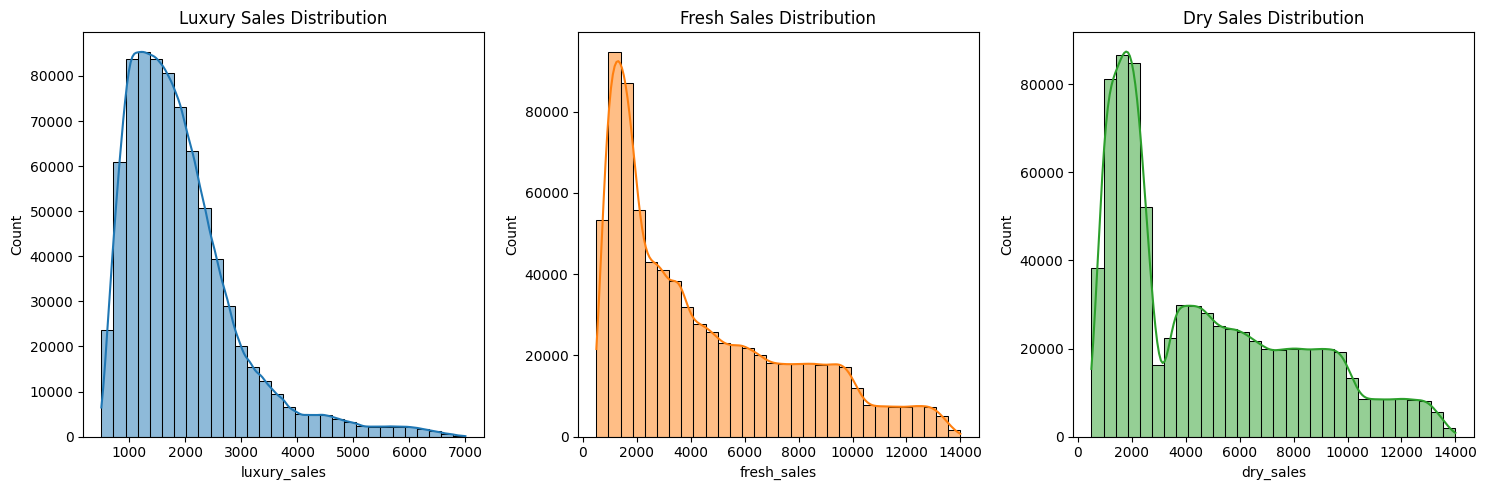

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(15, 5))

# Luxury Sales Histogram with custom color
plt.subplot(1, 3, 1)
sns.histplot(train['luxury_sales'], bins=30, kde=True, color='#1f77b4')  # Blue color
plt.title('Luxury Sales Distribution')

# Fresh Sales Histogram with custom color
plt.subplot(1, 3, 2)
sns.histplot(train['fresh_sales'], bins=30, kde=True, color='#ff7f0e')  # Orange color
plt.title('Fresh Sales Distribution')

# Dry Sales Histogram with custom color
plt.subplot(1, 3, 3)
sns.histplot(train['dry_sales'], bins=30, kde=True, color='#2ca02c')  # Green color
plt.title('Dry Sales Distribution')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [26]:
train.isnull().sum()

,0
Customer_ID,2
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0
cluster_category,0


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 774149 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774147 non-null  float64
 1   outlet_city       774149 non-null  object 
 2   luxury_sales      774149 non-null  float64
 3   fresh_sales       774149 non-null  float64
 4   dry_sales         774149 non-null  float64
 5   cluster_category  774149 non-null  object 
dtypes: float64(4), object(2)
memory usage: 41.3+ MB


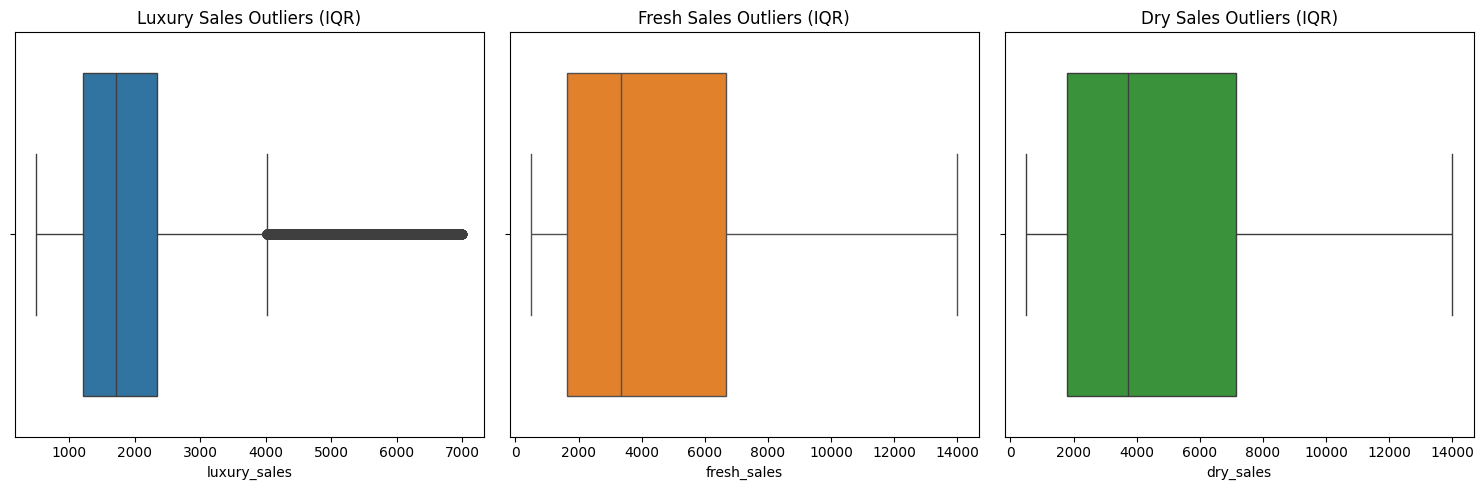

In [28]:
# Calculate IQR for each sales column and detect outliers
def detect_outliers_iqr(test, column):
    Q1 = test[column].quantile(0.25)
    Q3 = test[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (test[column] < lower_bound) | (test[column] > upper_bound)
    return outliers

# Create outlier detection using IQR for each sales column
train['outliers_luxury'] = detect_outliers_iqr(train, 'luxury_sales')
train['outliers_fresh'] = detect_outliers_iqr(train, 'fresh_sales')
train['outliers_dry'] = detect_outliers_iqr(train, 'dry_sales')

# Plotting separate box plots for each sales column
plt.figure(figsize=(15, 5))

# Luxury Sales Boxplot with custom color
plt.subplot(1, 3, 1)
sns.boxplot(x=train['luxury_sales'], color='#1f77b4')  # Blue color
plt.title('Luxury Sales Outliers (IQR)')

# Fresh Sales Boxplot with custom color
plt.subplot(1, 3, 2)
sns.boxplot(x=train['fresh_sales'], color='#ff7f0e')  # Orange color
plt.title('Fresh Sales Outliers (IQR)')

# Dry Sales Boxplot with custom color
plt.subplot(1, 3, 3)
sns.boxplot(x=train['dry_sales'], color='#2ca02c')  # Green color
plt.title('Dry Sales Outliers (IQR)')

plt.tight_layout()
plt.show()


In [29]:
def calculate_outlier_percentage(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    total = df[column].notnull().sum()
    percentage = (outliers / total) * 100
    return round(percentage, 2)

for col in ['luxury_sales', 'fresh_sales', 'dry_sales']:
    percent = calculate_outlier_percentage(train, col)
    print(f"Outlier percentage in '{col}': {percent}%")


Outlier percentage in 'luxury_sales': 4.53%
Outlier percentage in 'fresh_sales': 0.0%
Outlier percentage in 'dry_sales': 0.0%


In [30]:
train[["outliers_luxury" , "outliers_fresh" , "outliers_dry"]] = train[["outliers_luxury" , "outliers_fresh" , "outliers_dry"]].replace({True: 1, False: 0})

<ipython-input-30-6c1319169c0d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[["outliers_luxury" , "outliers_fresh" , "outliers_dry"]] = train[["outliers_luxury" , "outliers_fresh" , "outliers_dry"]].replace({True: 1, False: 0})


In [31]:
duplicate_rows = train.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [32]:
from sklearn import preprocessing

# Define the union list of cities (all cities across both datasets)
outlet_city_list = ['Batticaloa', 'Colombo', 'Dehiwala-Mount Lavinia', 'Anuradhapura', 'Galle',
                   'Gampaha', 'Homagama', 'Jaffna', 'Kaduwela', 'Kalmunai', 'Kandy', 'Katunayake',
                   'Kelaniya', 'Madawachiya', 'Kotte', 'Moratuwa', 'Negombo', 'Nuwara Eliya',
                   'Panadura', 'Peliyagoda', 'Trincomalee', 'Wattala']

label_encoder = preprocessing.LabelEncoder()

label_encoder.fit(outlet_city_list)
train['outlet_city_encoded'] = label_encoder.transform(train['outlet_city'])

print(train.head())



   Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
0   10493832.0    Kelaniya       1209.60       756.00    5292.00   
1   10178643.0    Moratuwa       1590.12      1060.08    6007.12   
2   10513916.0     Wattala       2288.88      1481.04    9155.52   
3   10334589.0     Wattala       2274.94      1739.66    9099.76   
4   10458365.0    Kelaniya       2345.49      2069.55    9243.99   

  cluster_category  outliers_luxury  outliers_fresh  outliers_dry  \
0                4                0               0             0   
1                1                0               0             0   
2                4                0               0             0   
3                4                0               0             0   
4                4                0               0             0   

   outlet_city_encoded  
0                   12  
1                   15  
2                   21  
3                   21  
4                   12  


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 774149 entries, 0 to 774154
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Customer_ID          774147 non-null  float64
 1   outlet_city          774149 non-null  object 
 2   luxury_sales         774149 non-null  float64
 3   fresh_sales          774149 non-null  float64
 4   dry_sales            774149 non-null  float64
 5   cluster_category     774149 non-null  object 
 6   outliers_luxury      774149 non-null  int64  
 7   outliers_fresh       774149 non-null  int64  
 8   outliers_dry         774149 non-null  int64  
 9   outlet_city_encoded  774149 non-null  int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 65.0+ MB


In [34]:
train.isnull().sum()

,0
Customer_ID,2
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0
cluster_category,0
outliers_luxury,0
outliers_fresh,0
outliers_dry,0
outlet_city_encoded,0


In [35]:
train.describe()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,outliers_luxury,outliers_fresh,outliers_dry,outlet_city_encoded
count,7.741470e+05,774149.000000,774149.000000,774149.000000,774149.000000,774149.0,774149.0,774149.000000
mean,1.038708e+07,1921.991930,4428.673308,4676.302562,0.045291,0.0,0.0,10.724813
std,2.234797e+05,1004.103989,3334.635179,3409.412526,0.207942,0.0,0.0,6.176585
min,1.000000e+07,500.000000,500.000000,500.000000,0.000000,0.0,0.0,1.000000
25%,1.019354e+07,1213.530000,1620.190000,1787.940000,0.000000,0.0,0.0,5.000000
50%,1.038708e+07,1715.300000,3356.540000,3727.760000,0.000000,0.0,0.0,10.000000
75%,1.058062e+07,2338.700000,6671.600000,7162.200000,0.000000,0.0,0.0,16.000000
max,1.077415e+07,6999.650000,13997.900000,13999.300000,1.000000,0.0,0.0,21.000000


In [36]:
train.to_csv('preprocessed_train_dataset.csv', index= False)